<a href="https://colab.research.google.com/github/sanjabh11/fastai-v3/blob/master/Diamonds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
# mount your google drive so you can save to it. You'll need to put in a token.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# print all the things

from fastai.utils.show_install import *
print(show_install())

!cat /proc/cpuinfo
!cat /proc/meminfo

!pip list

In [0]:
path = '/content/gdrive/My Drive/diamonds'

In [0]:
#!cp -r '/content/diamonds' '/content/gdrive/My Drive/'
#!cp -r '/content/gdrive/My Drive/diamonds' '/content'

## Get a list of URLs

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
#https://www.christianwerner.net/tech/Build-your-image-dataset-faster/#
!pip install git+https://github.com/cwerner/fastclass.git#egg=fastclass

In [0]:
!fcd -c BING -o diamonds -s 224 FakeDiamonds.csv

In [0]:
classes = ['Cubic_Zirconia_diamond', 'Zircon_diamond', 'Moissanite_diamond', 'White_Sapphire_diamond', 'Rutile_diamond', 'Spinel_diamond', 'Synthetic_Garnet_diamond', 'Type_Ia_diamond', 'Type_IIa_diamond', 'type_Ib_diamond', 'type_IIb_diamond']


In [0]:
path = Path('/content/diamonds/')

In [0]:
path.ls()

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=5000)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cubic_Zirconia_diamond',
  'Moissanite_diamond',
  'Rutile_diamond',
  'Spinel_diamond',
  'Synthetic_Garnet_diamond',
  'Type_IIa_diamond',
  'Type_Ia_diamond',
  'White_Sapphire_diamond',
  'Zircon_diamond',
  'type_IIb_diamond',
  'type_Ib_diamond'],
 11,
 5788,
 643)

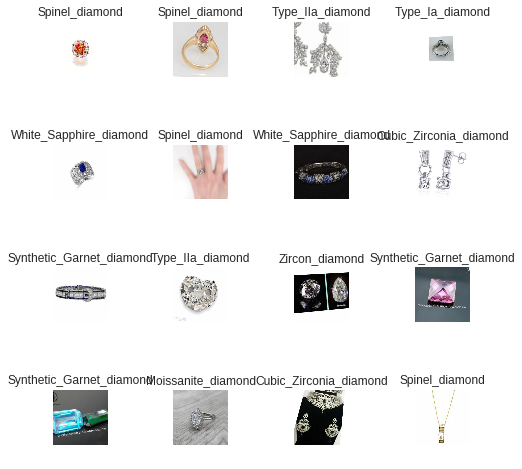

In [0]:
data.show_batch(rows=4, figsize=(7,7))

## Train model

In [0]:
learner = cnn_learner(data, models.resnet50, 
                      metrics=[error_rate, Recall(), Precision(), FBeta(), MatthewsCorreff()], 
                      path='/content/gdrive/My Drive/diamonds/models')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 51465261.07it/s]


In [0]:
#Let's make sure we have an appropriate loss function.
learner.loss_func

FlattenedLoss of CrossEntropyLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


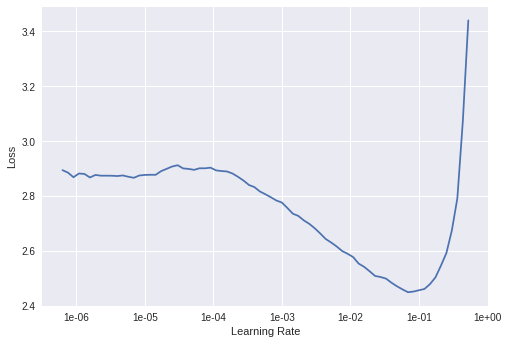

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,recall,precision,f_beta,matthews_correff,time
0,1.834389,1.531070,0.489891,0.450831,0.542123,0.451515,0.450023,03:16
1,1.624249,1.441093,0.427683,0.537327,0.548146,0.539457,0.523243,01:39
2,1.434895,1.395712,0.446345,0.519816,0.531821,0.522174,0.504722,01:40
3,1.249384,1.195154,0.377916,0.599163,0.613484,0.601974,0.579654,01:41
4,1.047081,1.136789,0.370140,0.606486,0.625997,0.610291,0.587379,01:41


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:178: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


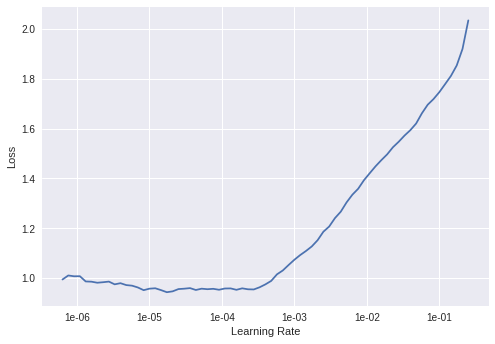

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(5, max_lr=slice(3e-6, 2e-05))

epoch,train_loss,valid_loss,error_rate,recall,precision,f_beta,matthews_correff,time
0,0.956790,1.127366,0.351477,0.621498,0.649870,0.619241,0.608085,02:12
1,0.950325,1.116025,0.354588,0.618883,0.647279,0.624361,0.604491,02:12
2,0.898895,1.100725,0.343701,0.632157,0.655397,0.636672,0.616664,02:12
3,0.885166,1.098169,0.345257,0.625372,0.647868,0.629745,0.614351,02:13
4,0.858965,1.098264,0.335925,0.635698,0.660994,0.640601,0.624758,02:13


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:178: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [0]:
learner.save('stage-2')

In [0]:
learner.unfreeze()
learner.fit_one_cycle(5, slice(3e-6, 2e-05))

epoch,train_loss,valid_loss,error_rate,recall,precision,f_beta,matthews_correff,time
0,0.824389,1.097163,0.335925,0.635441,0.650800,0.633143,0.625101,02:11
1,0.828765,1.098262,0.337481,0.635568,0.658118,0.639954,0.623720,02:11
2,0.802678,1.092772,0.331260,0.636081,0.661716,0.641048,0.630464,02:11
3,0.791132,1.089076,0.332815,0.631028,0.663055,0.637183,0.628622,02:11
4,0.759472,1.091395,0.331260,0.636200,0.660108,0.640842,0.630324,02:11


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:178: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [0]:
learner.save('stage-3')

In [0]:
learner.load('stage-3')

In [0]:
# data.export() that will save the internal information (classes, vocab in text, processors in tabular etc) need for inference in a file named ‘export.pkl’. You can then create an empty_data object by using DataBunch.load_empty(path) 
#(where path points to where this ‘export.pkl’ file is).
data.export()
#path is 'content/gdrive/My Drive/diamonds/export.pkl

## Interpretation

In [0]:
learner.load('stage-3');

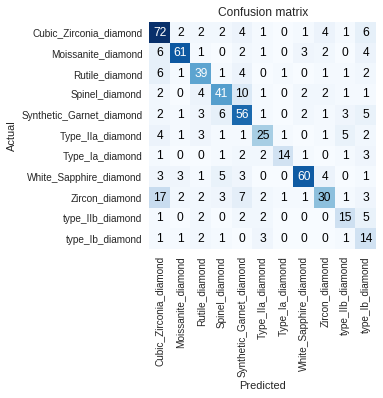

In [0]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(6)

[('Zircon_diamond', 'Cubic_Zirconia_diamond', 17),
 ('Spinel_diamond', 'Synthetic_Garnet_diamond', 10),
 ('Zircon_diamond', 'Synthetic_Garnet_diamond', 7),
 ('Cubic_Zirconia_diamond', 'type_Ib_diamond', 6),
 ('Moissanite_diamond', 'Cubic_Zirconia_diamond', 6),
 ('Rutile_diamond', 'Cubic_Zirconia_diamond', 6),
 ('Synthetic_Garnet_diamond', 'Spinel_diamond', 6)]

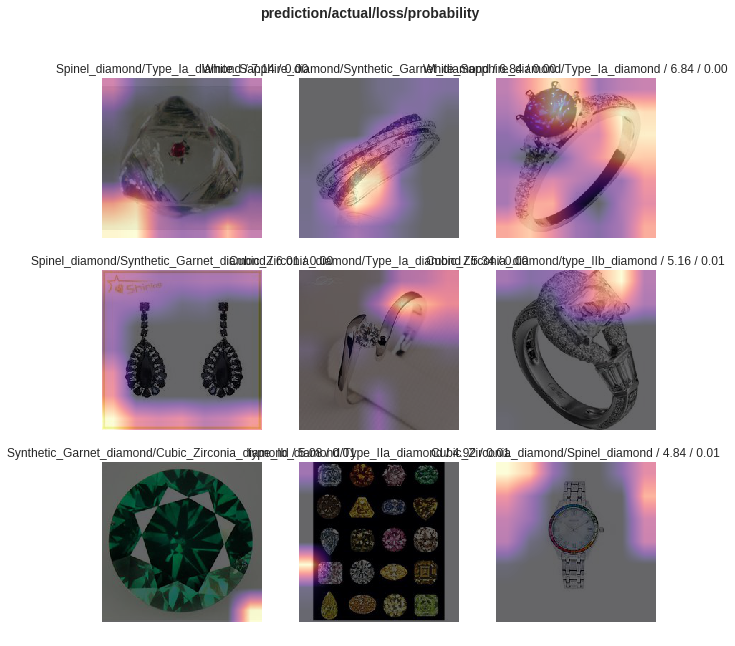

In [0]:
interp.plot_top_losses(9, figsize=(10,10))

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

In [0]:
pwd

'/content'

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

ImageCleaner(ds, idxs, path)

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learner.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).



You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

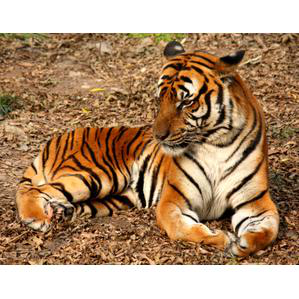

In [0]:
img = open_image('/content/tiger/South_China_tiger/000001.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

NameError: ignored

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



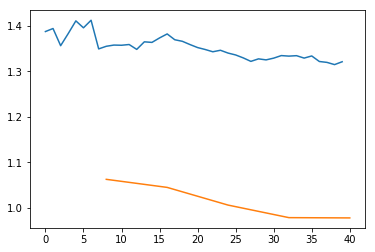

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2